In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### functions

In [15]:
batch_size = 1000

In [4]:
def compute_batch_fixed_size_accuracy(prediction_results,fixed_size):
    # Convert the lists to numpy arrays
    actual_labels_np = np.array(prediction_results['actual_labels'])
    prediction_labels_np = np.array(prediction_results['prediction_labels'])

    # Create the modified dictionary
    prediction_results = np.concatenate((actual_labels_np.reshape(-1, 1), prediction_labels_np.reshape(-1, 1)), axis=1)
    numEvents = prediction_results.shape[0]
    numBatches = int(numEvents/fixed_size)
    #print("Num batches is {}".format(numBatches))
    batch_accuracy = []
    for i in range(numBatches):
        batch_accuracy.append(round(np.sum(prediction_results[i*fixed_size:(i+1)*fixed_size,0]==prediction_results[i*fixed_size:(i+1)*fixed_size,1])/fixed_size, 4))
    total_accuracy = (prediction_results[:, 0] == prediction_results[:, 1]).sum() / prediction_results.shape[0]
    return batch_accuracy, total_accuracy

### get incomplete prediction results

In [5]:
prediction_results = pd.read_csv('/Users/meruozhu/Downloads/MP_data/MP_codes/MP/experiments/experiments_sdl_dycdd/results/BPIC15ALL_rbs4451_hbs0_2023-09-02_13-00-44/SDL_BPIC15ALL_OTF_drift_dynamic.csv',index_col=False,header=None).iloc[:,0:2]
prediction_results.columns = ['actual_labels','prediction_labels']

In [6]:
prediction_results

,actual_labels,prediction_labels
0,42,0
1,56,0
2,304,0
3,57,0
4,42,0
...,...,...
258326,142,142
258327,292,259
258328,142,142
258329,141,141


### get other prediction results to compare

In [49]:
prediction_results_1 = pd.read_csv('/Users/meruozhu/Downloads/MP_data/MP_codes/MP/experiments/experiments_sdl_dycdd/results_suddendrift/BPIC15ALL_rbs4451_hbs0_2023-09-03_00-31-09/prediction_results.csv')

In [50]:
prediction_results_2 = pd.read_csv('/Users/meruozhu/Downloads/MP_data/MP_codes/MP/experiments/experiments_sdl_update/results_suddendrift/BPIC15ALL_rbs4451_hbs0_2023-08-30_15-17-29/prediction_results.csv')

In [89]:
prediction_results_1 = pd.read_csv('/Users/meruozhu/Downloads/MP_data/MP_codes/MP/experiments/experiments_tfcl_sdl/results/BPIC15ALL_rbs1000_hbs200_2023-09-02_18-49-49/prediction_results.csv')
prediction_results_2 = pd.read_csv('/Users/meruozhu/Downloads/MP_data/MP_codes/MP/experiments/experiments_tfcl_sdl/results/BPIC15ALL_rbs1500_hbs300_2023-09-02_21-46-07/prediction_results.csv')
prediction_results_3 = pd.read_csv('/Users/meruozhu/Downloads/MP_data/MP_codes/MP/experiments/experiments_tfcl_sdl/results/BPIC15ALL_rbs4451_hbs890_2023-09-03_00-24-23/prediction_results.csv')
prediction_results_4 = pd.read_csv('/Users/meruozhu/Downloads/MP_data/MP_codes/MP/experiments/experiments_tfcl_sdl/results_suddendrift/BPIC15ALL_rbs500_hbs100_2023-08-30_14-19-39/prediction_results.csv')

In [90]:
# prediction_results_3 = pd.read_csv('/Users/meruozhu/Downloads/MP_data/MP_codes/MP/experiments/experiments_tfcl_sdl/results/BPIC15ALL_rbs4451_hbs890_2023-09-03_00-24-23/prediction_results.csv')

### calculate accuracy to compare

In [91]:
batch_accuracy_1, total_accuracy_1 = compute_batch_fixed_size_accuracy(prediction_results,batch_size)

In [92]:
batch_accuracy_2, total_accuracy_2 = compute_batch_fixed_size_accuracy(prediction_results_2,batch_size)

In [93]:
batch_accuracy_3, total_accuracy_3 = compute_batch_fixed_size_accuracy(prediction_results_3,batch_size)
batch_accuracy_4, total_accuracy_4 = compute_batch_fixed_size_accuracy(prediction_results_4,batch_size)

### make a figure to compare accuracy lines

In [94]:
len(batch_accuracy_2[:len(batch_accuracy_1)])
print(len(batch_accuracy_1))

258


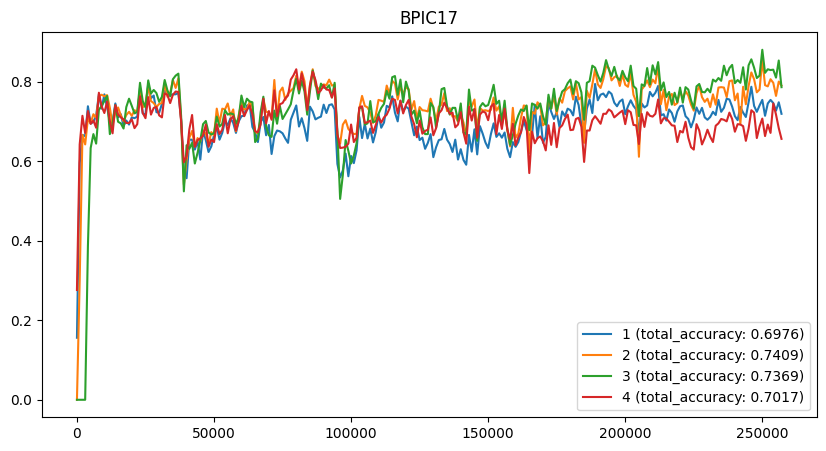

In [96]:
plt.figure(figsize=(10,5))
x_values = [x * batch_size for x in range(len(batch_accuracy_1))]
plt.plot(x_values, batch_accuracy_1, label=f"{1} (total_accuracy: {total_accuracy_1:.4f})")
plt.plot(x_values, batch_accuracy_2[:len(batch_accuracy_1)], label=f"{2} (total_accuracy: {total_accuracy_2:.4f})")
plt.plot(x_values, batch_accuracy_3[:len(batch_accuracy_1)], label=f"{3} (total_accuracy: {total_accuracy_3:.4f})")
plt.plot(x_values, batch_accuracy_4[:len(batch_accuracy_1)], label=f"{4} (total_accuracy: {total_accuracy_4:.4f})")
plt.title('BPIC17')
plt.legend()